In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#!pip install transformers

**Read File JSon**

**READ TRAIN DATASET**

In [3]:
import json

# Đường dẫn đến tệp JSONL
file_path = '/content/drive/MyDrive/train.jsonl'

# Tạo một danh sách để lưu trữ các đối tượng từ tệp JSONL
data_list = []

# Đọc từng dòng trong tệp JSONL và phân tích thành các đối tượng JSON
with open(file_path, 'r') as file:
    for line in file:
        data = json.loads(line)
        data_list.append(data)

# In danh sách các đối tượng
print(data_list)


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



**READ TEST DATASET**

In [4]:
import json

# Đường dẫn đến tệp JSONL
file_path = '/content/drive/MyDrive/paper_test.jsonl'

# Tạo một danh sách để lưu trữ các đối tượng từ tệp JSONL
Test = []

# Đọc từng dòng trong tệp JSONL và phân tích thành các đối tượng JSON
with open(file_path, 'r') as file:
    for line in file:
        data = json.loads(line)
        Test.append(data)

# In danh sách các đối tượng
print(Test)


[{'id': 113501, 'verifiable': 'NOT VERIFIABLE', 'label': 'NOT ENOUGH INFO', 'claim': 'Grease had bad reviews.', 'evidence': [[[133128, None, None, None]]]}, {'id': 163803, 'verifiable': 'VERIFIABLE', 'label': 'SUPPORTS', 'claim': 'Ukrainian Soviet Socialist Republic was a founding participant of the UN.', 'evidence': [[[296950, 288668, 'Ukrainian_Soviet_Socialist_Republic', 7]], [[298602, 290067, 'Ukrainian_Soviet_Socialist_Republic', 7], [298602, 290067, 'United_Nations', 0]], [[300696, 291816, 'Ukrainian_Soviet_Socialist_Republic', 7]], [[344347, 327887, 'Ukrainian_Soviet_Socialist_Republic', 7]], [[344994, 328433, 'Ukrainian_Soviet_Socialist_Republic', 7]], [[344997, 328435, 'Ukrainian_Soviet_Socialist_Republic', 7]]]}, {'id': 70041, 'verifiable': 'VERIFIABLE', 'label': 'SUPPORTS', 'claim': '2 Hearts is a musical composition by Minogue.', 'evidence': [[[225394, 230056, '2_Hearts_-LRB-Kylie_Minogue_song-RRB-', 0]], [[317953, 306972, '2_Hearts_-LRB-Kylie_Minogue_song-RRB-', 0]], [[319

**READ VAL DATASET**

In [5]:
import json

# Đường dẫn đến tệp JSONL
file_path = '/content/drive/MyDrive/paper_dev.jsonl'

# Tạo một danh sách để lưu trữ các đối tượng từ tệp JSONL
Val = []

# Đọc từng dòng trong tệp JSONL và phân tích thành các đối tượng JSON
with open(file_path, 'r') as file:
    for line in file:
        data = json.loads(line)
        Val.append(data)

# In danh sách các đối tượng
print(Val)


[{'id': 91198, 'verifiable': 'NOT VERIFIABLE', 'label': 'NOT ENOUGH INFO', 'claim': 'Colin Kaepernick became a starting quarterback during the 49ers 63rd season in the National Football League.', 'evidence': [[[108548, None, None, None]]]}, {'id': 194462, 'verifiable': 'NOT VERIFIABLE', 'label': 'NOT ENOUGH INFO', 'claim': 'Tilda Swinton is a vegan.', 'evidence': [[[227768, None, None, None]]]}, {'id': 137334, 'verifiable': 'VERIFIABLE', 'label': 'SUPPORTS', 'claim': 'Fox 2000 Pictures released the film Soul Food.', 'evidence': [[[289914, 283015, 'Soul_Food_-LRB-film-RRB-', 0]], [[291259, 284217, 'Soul_Food_-LRB-film-RRB-', 0]], [[293412, 285960, 'Soul_Food_-LRB-film-RRB-', 0]], [[337212, 322620, 'Soul_Food_-LRB-film-RRB-', 0]], [[337214, 322622, 'Soul_Food_-LRB-film-RRB-', 0]]]}, {'id': 166626, 'verifiable': 'NOT VERIFIABLE', 'label': 'NOT ENOUGH INFO', 'claim': 'Anne Rice was born in New Jersey.', 'evidence': [[[191656, None, None, None], [191657, None, None, None]]]}, {'id': 111897,

In [6]:
len(Test)

9999

In [7]:
Test[0]

{'id': 113501,
 'verifiable': 'NOT VERIFIABLE',
 'label': 'NOT ENOUGH INFO',
 'claim': 'Grease had bad reviews.',
 'evidence': [[[133128, None, None, None]]]}

In [8]:
len(data_list)

145449

In [9]:
data_list[0]

{'id': 75397,
 'verifiable': 'VERIFIABLE',
 'label': 'SUPPORTS',
 'claim': 'Nikolaj Coster-Waldau worked with the Fox Broadcasting Company.',
 'evidence': [[[92206, 104971, 'Nikolaj_Coster-Waldau', 7],
   [92206, 104971, 'Fox_Broadcasting_Company', 0]]]}

In [10]:
len(Val)

9999

**I. Preprocessing Data**

**Check Len**

In [11]:
Count_Support = 0
Count_Refuted = 0
Count_NEI = 0
for i in range(0,145449):
  if data_list[i]['label'] == 'SUPPORTS' :
    Count_Support += 1
  if data_list[i]['label'] == 'REFUTES':
    Count_Refuted += 1
  if data_list[i]['label'] == 'NOT ENOUGH INFO' :
    Count_NEI += 1
print('SP: ', Count_Support)
print('RF: ', Count_Refuted)
print('NEI: ', Count_NEI)

SP:  80035
RF:  29775
NEI:  35639


In [12]:
29775/145449 * 20000

4094.2185920838233

**DATA TRAIN**

In [13]:
data_train = []
Count_Support = 0
Count_Refuted = 0
Count_NEI = 0
for i in range(0,145449):
  if data_list[i]['label'] == 'SUPPORTS' :
    Count_Support += 1
    if Count_Support <= 80035 :
      data_train.append(data_list[i])
  if data_list[i]['label'] == 'REFUTES':
    Count_Refuted += 1
    if Count_Refuted <= 29775 :
      data_train.append(data_list[i])
  if data_list[i]['label'] == 'NOT ENOUGH INFO' :
    Count_NEI += 1
    if Count_NEI <= 35639 :
      data_train.append(data_list[i])
Count_Support = 0
Count_Refuted = 0
Count_NEI = 0
for i in range(145449):
  if data_train[i]['label'] == 'SUPPORTS' :
    Count_Support += 1
  if data_train[i]['label'] == 'REFUTES':
    Count_Refuted += 1
  if data_train[i]['label'] == 'NOT ENOUGH INFO' :
    Count_NEI += 1
print('SP: ', Count_Support)
print('RF: ', Count_Refuted)
print('NEI: ', Count_NEI)

SP:  80035
RF:  29775
NEI:  35639


In [14]:
len(data_train)

145449

**DATA TEST**

In [15]:
data_test = []
Count_Support = 0
Count_Refuted = 0
Count_NEI = 0
for i in range(9999):
  if Test[i]['label'] == 'SUPPORTS' :
    Count_Support += 1
    if Count_Support <= 3333 :
      data_test.append(data_list[i])
  if Test[i]['label'] == 'REFUTES':
    Count_Refuted += 1
    if Count_Refuted <= 3333 :
      data_test.append(data_list[i])
  if Test[i]['label'] == 'NOT ENOUGH INFO' :
    Count_NEI += 1
    if Count_NEI <= 3333 :
      data_test.append(data_list[i])

In [16]:
len(data_test)

9999

In [17]:
Count_Support = 0
Count_Refuted = 0
Count_NEI = 0
for i in range(9999):
  if data_test[i]['label'] == 'SUPPORTS' :
    Count_Support += 1
  if data_test[i]['label'] == 'REFUTES':
    Count_Refuted += 1
  if data_test[i]['label'] == 'NOT ENOUGH INFO' :
    Count_NEI += 1
print('SP: ', Count_Support)
print('RF: ', Count_Refuted)
print('NEI: ', Count_NEI)

SP:  5383
RF:  2023
NEI:  2593


**DATA VAL**

In [18]:
data_val = []
Count_Support = 0
Count_Refuted = 0
Count_NEI = 0
for i in range(9999):
  data_val.append(Val[i])

In [19]:
train_text = []
train_label = []
train_claim = []

test_text = []
test_label = []
test_claim = []

val_text = []
val_label = []
val_claim = []

**LABEL**

In [20]:
from gensim.utils import simple_preprocess
def labelencoder(text):
        if text=='SUPPORTS':
            return 2
        elif text == 'REFUTES':
            return 0
        else:
          return 1

In [21]:
from tensorflow.keras.utils import to_categorical
import numpy as np

**TRAIN LABEL**

In [22]:
train_label = []
for i in range(145449):
  train_label.append(labelencoder(data_train[i]['label']))

In [23]:
len(train_label)

145449

In [24]:
train_label = to_categorical(train_label, num_classes=3)
train_label

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

**TEST LABEL**

In [25]:
test_label = []
for i in range(9999):
  test_label.append(labelencoder(data_test[i]['label']))

In [26]:
len(test_label)

9999

In [27]:
test_label = to_categorical(test_label, num_classes=3)
test_label

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

**VAL LABEL**

In [28]:
val_label = []
for i in range(9999):
  val_label.append(labelencoder(data_val[i]['label']))

In [29]:
len(test_label)

9999

In [30]:
val_label = to_categorical(val_label, num_classes=3)
val_label

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

**TEXT**

**TRAIN TEXT**

In [31]:
train_text = []
for i in range(145449):
  a = ''
  a += '"' + str(data_train[i]['evidence']) + '"'
  train_text.append(a)
train_text

['"[[[92206, 104971, \'Nikolaj_Coster-Waldau\', 7], [92206, 104971, \'Fox_Broadcasting_Company\', 0]]]"',
 '"[[[174271, 187498, \'Roman_Atwood\', 1]], [[174271, 187499, \'Roman_Atwood\', 3]]]"',
 '"[[[255136, 254645, \'History_of_art\', 2]]]"',
 '"[[[180804, 193183, \'Adrienne_Bailon\', 0]]]"',
 '"[[[100277, None, None, None]]]"',
 '"[[[151831, 166598, \'Homeland_-LRB-TV_series-RRB-\', 0], [151831, 166598, \'Prisoners_of_War_-LRB-TV_series-RRB-\', 0]]]"',
 '"[[[173384, None, None, None]]]"',
 '"[[[273626, None, None, None]]]"',
 '"[[[49158, 58489, \'Boston_Celtics\', 3]], [[49159, 58490, \'Boston_Celtics\', 3]]]"',
 '"[[[23513, 28977, \'The_Ten_Commandments_-LRB-1956_film-RRB-\', 0]], [[23513, 28978, \'The_Ten_Commandments_-LRB-1956_film-RRB-\', 20]]]"',
 '"[[[269479, 265800, \'Tetris\', 18]]]"',
 '"[[[56492, 66697, \'Cyndi_Lauper\', 2]]]"',
 '"[[[93100, 106004, \'The_Hunger_Games_-LRB-film-RRB-\', 0]], [[93100, 106005, \'The_Hunger_Games_-LRB-film-RRB-\', 1]], [[93100, 106006, \'The_H

In [32]:
len(train_text)

145449

In [33]:
train_text[0:10]

['"[[[92206, 104971, \'Nikolaj_Coster-Waldau\', 7], [92206, 104971, \'Fox_Broadcasting_Company\', 0]]]"',
 '"[[[174271, 187498, \'Roman_Atwood\', 1]], [[174271, 187499, \'Roman_Atwood\', 3]]]"',
 '"[[[255136, 254645, \'History_of_art\', 2]]]"',
 '"[[[180804, 193183, \'Adrienne_Bailon\', 0]]]"',
 '"[[[100277, None, None, None]]]"',
 '"[[[151831, 166598, \'Homeland_-LRB-TV_series-RRB-\', 0], [151831, 166598, \'Prisoners_of_War_-LRB-TV_series-RRB-\', 0]]]"',
 '"[[[173384, None, None, None]]]"',
 '"[[[273626, None, None, None]]]"',
 '"[[[49158, 58489, \'Boston_Celtics\', 3]], [[49159, 58490, \'Boston_Celtics\', 3]]]"',
 '"[[[23513, 28977, \'The_Ten_Commandments_-LRB-1956_film-RRB-\', 0]], [[23513, 28978, \'The_Ten_Commandments_-LRB-1956_film-RRB-\', 20]]]"']

**TEST TEXT**

In [34]:
test_text = []
for i in range(9999):
  a = ''
  a += '"' + str(data_test[i]['evidence']) + '"'
  test_text.append(a)
test_text

['"[[[92206, 104971, \'Nikolaj_Coster-Waldau\', 7], [92206, 104971, \'Fox_Broadcasting_Company\', 0]]]"',
 '"[[[174271, 187498, \'Roman_Atwood\', 1]], [[174271, 187499, \'Roman_Atwood\', 3]]]"',
 '"[[[255136, 254645, \'History_of_art\', 2]]]"',
 '"[[[180804, 193183, \'Adrienne_Bailon\', 0]]]"',
 '"[[[100277, None, None, None]]]"',
 '"[[[151831, 166598, \'Homeland_-LRB-TV_series-RRB-\', 0], [151831, 166598, \'Prisoners_of_War_-LRB-TV_series-RRB-\', 0]]]"',
 '"[[[173384, None, None, None]]]"',
 '"[[[273626, None, None, None]]]"',
 '"[[[49158, 58489, \'Boston_Celtics\', 3]], [[49159, 58490, \'Boston_Celtics\', 3]]]"',
 '"[[[23513, 28977, \'The_Ten_Commandments_-LRB-1956_film-RRB-\', 0]], [[23513, 28978, \'The_Ten_Commandments_-LRB-1956_film-RRB-\', 20]]]"',
 '"[[[269479, 265800, \'Tetris\', 18]]]"',
 '"[[[56492, 66697, \'Cyndi_Lauper\', 2]]]"',
 '"[[[93100, 106004, \'The_Hunger_Games_-LRB-film-RRB-\', 0]], [[93100, 106005, \'The_Hunger_Games_-LRB-film-RRB-\', 1]], [[93100, 106006, \'The_H

In [35]:
len(test_text)

9999

In [36]:
test_text[0]

'"[[[92206, 104971, \'Nikolaj_Coster-Waldau\', 7], [92206, 104971, \'Fox_Broadcasting_Company\', 0]]]"'

**VAL TEXT**

In [37]:
val_text = []
for i in range(9999):
  a = ''
  a += '"' + str(data_val[i]['evidence']) + '"'
  val_text.append(a)
val_text

['"[[[108548, None, None, None]]]"',
 '"[[[227768, None, None, None]]]"',
 '"[[[289914, 283015, \'Soul_Food_-LRB-film-RRB-\', 0]], [[291259, 284217, \'Soul_Food_-LRB-film-RRB-\', 0]], [[293412, 285960, \'Soul_Food_-LRB-film-RRB-\', 0]], [[337212, 322620, \'Soul_Food_-LRB-film-RRB-\', 0]], [[337214, 322622, \'Soul_Food_-LRB-film-RRB-\', 0]]]"',
 '"[[[191656, None, None, None], [191657, None, None, None]]]"',
 '"[[[131371, 146144, \'Telemundo\', 0]], [[131371, 146148, \'Telemundo\', 1]], [[131371, 146150, \'Telemundo\', 4], [131371, 146150, \'Hispanic_and_Latino_Americans\', 0]], [[131371, 146151, \'Telemundo\', 5]]]"',
 '"[[[107201, 120581, \'Damon_Albarn\', 17]]]"',
 '"[[[210946, 218608, \'Mogadishu\', 0]]]"',
 '"[[[260471, 258880, \'Savages_-LRB-2012_film-RRB-\', 3]], [[260473, 258882, \'Savages_-LRB-2012_film-RRB-\', 3]]]"',
 '"[[[227658, None, None, None]]]"',
 '"[[[127089, 141573, \'Andrew_Kevin_Walker\', 0]]]"',
 '"[[[163853, None, None, None]]]"',
 '"[[[129277, None, None, None]]

In [38]:
len(val_text)

9999

In [39]:
val_text[0]

'"[[[108548, None, None, None]]]"'

**CLAIM**

**TRAIN CLAIM**

In [40]:
train_claim = []
for i in range(145449):
  a = ''
  a += str(data_train[i]['claim'])
  train_claim.append(a)
train_claim

['Nikolaj Coster-Waldau worked with the Fox Broadcasting Company.',
 'Roman Atwood is a content creator.',
 'History of art includes architecture, dance, sculpture, music, painting, poetry literature, theatre, narrative, film, photography and graphic arts.',
 'Adrienne Bailon is an accountant.',
 'System of a Down briefly disbanded in limbo.',
 'Homeland is an American television spy thriller based on the Israeli television series Prisoners of War.',
 'Beautiful reached number two on the Billboard Hot 100 in 2003.',
 'Neal Schon was named in 1954.',
 'The Boston Celtics play their home games at TD Garden.',
 'The Ten Commandments is an epic film.',
 'Tetris has sold millions of physical copies.',
 'Cyndi Lauper won the Best New Artist award at the 27th Grammy Awards in 1985.',
 'There is a movie called The Hunger Games.',
 'Ryan Gosling has been to a country in Africa.',
 'Stranger Things is set in Bloomington, Indiana.',
 'Ryan Seacrest is a person.',
 'Puerto Rico is not an unincorpo

In [41]:
len(train_claim)

145449

In [42]:
train_claim[0]

'Nikolaj Coster-Waldau worked with the Fox Broadcasting Company.'

**TEST CLAIM**

In [43]:
test_claim = []
for i in range(9999):
  a = ''
  a +=  str(data_test[i]['claim'])
  test_claim.append(a)
test_claim

['Nikolaj Coster-Waldau worked with the Fox Broadcasting Company.',
 'Roman Atwood is a content creator.',
 'History of art includes architecture, dance, sculpture, music, painting, poetry literature, theatre, narrative, film, photography and graphic arts.',
 'Adrienne Bailon is an accountant.',
 'System of a Down briefly disbanded in limbo.',
 'Homeland is an American television spy thriller based on the Israeli television series Prisoners of War.',
 'Beautiful reached number two on the Billboard Hot 100 in 2003.',
 'Neal Schon was named in 1954.',
 'The Boston Celtics play their home games at TD Garden.',
 'The Ten Commandments is an epic film.',
 'Tetris has sold millions of physical copies.',
 'Cyndi Lauper won the Best New Artist award at the 27th Grammy Awards in 1985.',
 'There is a movie called The Hunger Games.',
 'Ryan Gosling has been to a country in Africa.',
 'Stranger Things is set in Bloomington, Indiana.',
 'Ryan Seacrest is a person.',
 'Puerto Rico is not an unincorpo

In [44]:
len(test_claim)

9999

In [45]:
test_claim[0]

'Nikolaj Coster-Waldau worked with the Fox Broadcasting Company.'

**VAL CLAIM**

In [46]:
val_claim = []
for i in range(9999):
  a = ''
  a += str(data_val[i]['claim'])
  val_claim.append(a)
val_claim

['Colin Kaepernick became a starting quarterback during the 49ers 63rd season in the National Football League.',
 'Tilda Swinton is a vegan.',
 'Fox 2000 Pictures released the film Soul Food.',
 'Anne Rice was born in New Jersey.',
 'Telemundo is a English-language television network.',
 "Damon Albarn's debut album was released in 2011.",
 'There is a capital called Mogadishu.',
 'Savages was exclusively a German film.',
 'Happiness in Slavery is a gospel song by Nine Inch Nails.',
 'Andrew Kevin Walker is only Chinese.',
 'Shooter is about an expert marksman who tries to stop the assassination of the president.',
 'House is a sitcom.',
 'The Cretaceous ended.',
 "Murda Beatz's real name is Marshall Mathers.",
 'Nicholas Brody is a character on Homeland.',
 'Charles Manson has been proven innocent of all crimes.',
 'Sean Penn is only ever a stage actor.',
 'Don Bradman retired from soccer.',
 'L.A. Reid has served as the CEO of Arista Records for four years.',
 'Brad Wilk helped co-fou

In [47]:
len(val_claim)

9999

In [48]:
val_claim[0]

'Colin Kaepernick became a starting quarterback during the 49ers 63rd season in the National Football League.'

**PROCESSING DATA**

<Axes: >

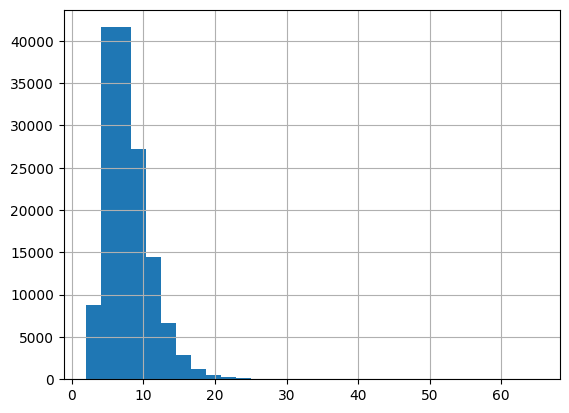

In [49]:
import pandas as pd
seq_len = [len(i.split()) for i in train_claim]
pd.Series(seq_len).hist(bins = 30)

**BUILD LIBRARY**

In [50]:
vocab_size = 10000
embedding_dim = 64
max_lenght = 30

In [51]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [52]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token = "<OOV>")
tokenizer.fit_on_texts(train_text)

In [53]:
tokenizer.word_index

{'<OOV>': 1,
 'none': 2,
 '0': 3,
 "'": 4,
 'lrb': 5,
 'rrb': 6,
 '1': 7,
 'film': 8,
 '2': 9,
 "'the": 10,
 '3': 11,
 'of': 12,
 '6': 13,
 '5': 14,
 '7': 15,
 '4': 16,
 '8': 17,
 'the': 18,
 '9': 19,
 '10': 20,
 'series': 21,
 '11': 22,
 'tv': 23,
 '12': 24,
 '13': 25,
 '14': 26,
 '15': 27,
 '16': 28,
 '17': 29,
 '18': 30,
 'colon': 31,
 '19': 32,
 "'john": 33,
 'song': 34,
 'album': 35,
 '20': 36,
 '21': 37,
 'and': 38,
 "'david": 39,
 "'michael": 40,
 '22': 41,
 "'tom": 42,
 'a': 43,
 '23': 44,
 "'george": 45,
 "'a": 46,
 '2016': 47,
 'in': 48,
 'f': 49,
 '24': 50,
 "'paul": 51,
 "'chris": 52,
 "'united": 53,
 'actor': 54,
 'c': 55,
 'band': 56,
 "'star": 57,
 'to': 58,
 "jackson'": 59,
 "'richard": 60,
 'musician': 61,
 's': 62,
 '26': 63,
 'on': 64,
 "williams'": 65,
 '25': 66,
 "'jennifer": 67,
 "'kurt": 68,
 "'robert": 69,
 'man': 70,
 "'james": 71,
 "'new": 72,
 "'frank": 73,
 "'leonardo": 74,
 "'steve": 75,
 "angle'": 76,
 "'mike": 77,
 '29': 78,
 "2'": 79,
 'game': 80,
 "'mar

**PAD SEQUENCES TRAIN TEXT**

In [54]:
train_text_sequences = tokenizer.texts_to_sequences(train_text)

In [55]:
#train_text_sequences

In [56]:
pad_train_text_sequences = pad_sequences(train_text_sequences, maxlen = max_lenght, truncating='post', padding='post')

In [57]:
#pad_train_text_sequences

In [58]:
len(pad_train_text_sequences[0])

30

**PAD SEQUENCES TRAIN CLAIM**

In [59]:
train_claim_sequences = tokenizer.texts_to_sequences(train_claim)

In [60]:
#train_claim_sequences

In [61]:
pad_train_claim_sequences = pad_sequences(train_claim_sequences, maxlen = max_lenght, truncating='post', padding='post')

In [ ]:
pad_train_claim_sequences

**VAL**

In [71]:
val_claim_sequences = tokenizer.texts_to_sequences(val_claim)
pad_val_claim_sequences = pad_sequences(val_claim_sequences, maxlen = max_lenght, truncating='post', padding='post')

In [72]:
val_text_sequences = tokenizer.texts_to_sequences(val_text)
pad_val_text_sequences = pad_sequences(val_text_sequences, maxlen = max_lenght, truncating='post', padding='post')

**MODEL**

In [67]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding, LSTM, Dense, Attention, Concatenate, Dropout, Flatten, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.layers import LSTM, Dense, Concatenate, Embedding, Bidirectional, GlobalMaxPooling1D, Dropout, Reshape, GRU, SpatialDropout1D, Conv1D, GlobalAveragePooling1D
from keras.models import Model
from keras.layers import Input
import numpy as np

In [68]:
text_input = tf.keras.Input(shape=(None,), dtype='int32')
claim_input = tf.keras.Input(shape=(None,), dtype='int32')

In [69]:
token_embedding = tf.keras.layers.Embedding(input_dim=1000, output_dim=64)
# Query embeddings of shape [batch_size, Tq, dimension].
text_embeddings = token_embedding(text_input)
# Value embeddings of shape [batch_size, Tv, dimension].
claim_embeddings = token_embedding(claim_input)

# CNN layer.
cnn_layer = tf.keras.layers.Conv1D(
    filters=100,
    kernel_size=4,
    # Use 'same' padding so outputs have the same shape as inputs.
    padding='same')
# Query encoding of shape [batch_size, Tq, filters].
text_seq_encoding = cnn_layer(text_embeddings)
# Value encoding of shape [batch_size, Tv, filters].
claim_seq_encoding = cnn_layer(claim_embeddings)

# Query-value attention of shape [batch_size, Tq, filters].
text_claim_attention_seq = tf.keras.layers.Attention()(
    [text_seq_encoding, claim_seq_encoding])

# Reduce over the sequence axis to produce encodings of shape
# [batch_size, filters].
text_encoding = tf.keras.layers.GlobalAveragePooling1D()(
    text_seq_encoding)
text_claim_attention = tf.keras.layers.GlobalAveragePooling1D()(
    text_claim_attention_seq)

# Concatenate query and document encodings to produce a DNN input layer.
input_layer = tf.keras.layers.Concatenate()(
    [text_encoding, text_claim_attention])

x = Dropout(0.5)(input_layer)
out = Dense(3, activation='softmax')(x)

In [70]:
model = Model(
    inputs=[text_input, claim_input],
    outputs=out,
)
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['categorical_accuracy'])

    # In thông tin về kiến trúc mô hình
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, None)]               0         []                            
                                                                                                  
 input_4 (InputLayer)        [(None, None)]               0         []                            
                                                                                                  
 embedding (Embedding)       (None, None, 64)             64000     ['input_3[0][0]',             
                                                                     'input_4[0][0]']             
                                                                                                  
 conv1d (Conv1D)             (None, None, 100)            25700     ['embedding[0][0]',       

In [74]:
model.fit([pad_train_text_sequences, pad_train_claim_sequences], train_label, epochs = 50, validation_data = ([pad_val_text_sequences, pad_val_claim_sequences], val_label))

Epoch 1/50
4546/4546 [==============================] - 57s 10ms/step - loss: 0.5244 - categorical_accuracy: 0.7697 - val_loss: 0.5531 - val_categorical_accuracy: 0.6666
Epoch 2/50
4546/4546 [==============================] - 29s 6ms/step - loss: 0.4344 - categorical_accuracy: 0.7952 - val_loss: 0.5076 - val_categorical_accuracy: 0.6711
Epoch 3/50
4546/4546 [==============================] - 27s 6ms/step - loss: 0.4232 - categorical_accuracy: 0.7963 - val_loss: 0.5030 - val_categorical_accuracy: 0.6786
Epoch 4/50
4546/4546 [==============================] - 28s 6ms/step - loss: 0.4188 - categorical_accuracy: 0.7971 - val_loss: 0.5084 - val_categorical_accuracy: 0.6801
Epoch 5/50
4546/4546 [==============================] - 29s 6ms/step - loss: 0.4159 - categorical_accuracy: 0.7990 - val_loss: 0.5158 - val_categorical_accuracy: 0.6812
Epoch 6/50
4546/4546 [==============================] - 27s 6ms/step - loss: 0.4138 - categorical_accuracy: 0.7999 - val_loss: 0.5216 - val_categorical_ac

**Evaluate Model**

In [75]:
test_claim_sequences = tokenizer.texts_to_sequences(test_claim)
pad_test_claim_sequences = pad_sequences(test_claim_sequences, maxlen = max_lenght, truncating='post', padding='post')

test_text_sequences = tokenizer.texts_to_sequences(test_text)
pad_test_text_sequences = pad_sequences(test_text_sequences, maxlen = max_lenght, truncating='post', padding='post')

In [76]:
Test_array = model.predict([pad_test_text_sequences, pad_test_claim_sequences])

313/313 [==============================] - 1s 2ms/step


In [ ]:
Test_array

In [78]:
import numpy as np
y_predict = []
for i in range(9999):
  max_index = np.argmax(Test_array[i], axis = -1)
  y_predict.append(max_index)

In [ ]:
y_predict

In [79]:
import numpy as np
y_true = []
for i in range(9999):
  max_index = np.argmax(test_label[i], axis = -1)
  y_true.append(max_index)

In [ ]:
y_true

In [83]:
count = 0
for i in range(9999):
  if y_true[i] == y_predict[i]:
    count += 1
print('Xac suat du doan dung: ', (count/9999))
print('So luong du doan dung: ', count)

Xac suat du doan dung:  0.8221822182218221
So luong du doan dung:  8221


In [84]:
import numpy as np
from sklearn.metrics import f1_score

# Tính F1 Macro
f1_macro = f1_score(y_true, y_predict, average='macro')

print("F1 Macro:", f1_macro)

F1 Macro: 0.7206341617182055


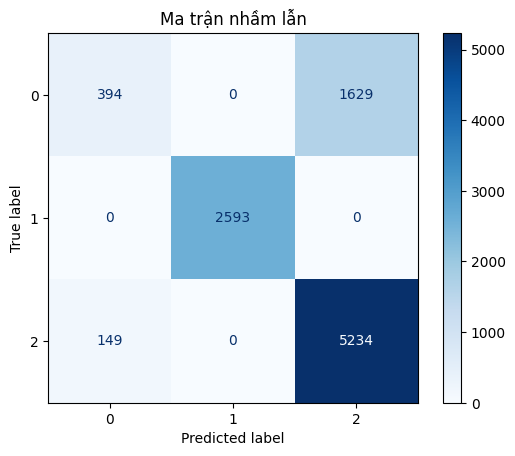

In [85]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# Tính ma trận nhầm lẫn
cm = confusion_matrix(y_true, y_predict)

# Vẽ biểu đồ ma trận nhầm lẫn
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1', '2'])
disp.plot(cmap='Blues')

plt.title('Ma trận nhầm lẫn')
plt.show()
